# Intro to Probabilsitic Programming (PyMC)

In [4]:
%pip install pytensor pymc

In [5]:
import numpy as np
# Assume N trials and K successes out of those trials
# Change these numbers to see how the posterior plot changes
#trials = 500; successes = 250

np.random.seed()

p_true = 0.35

# Number of tosses
trials = 20  # Replace with your desired number of tosses

# Simulating N coin tosses
successes = np.random.binomial(trials, p_true)

print(f"N tosses: {trials}, heads: {successes}")

N tosses: 20, heads: 5


In [6]:
import pymc as pm

# Set up model context
with pm.Model() as coin_flip_model:
    # Probability p of success we want to estimate
    # and assign Beta prior
    p = pm.Beta("p", alpha=1, beta=1)

    # Define likelihood
    obs = pm.Binomial("obs", p=p, n=trials,
        observed=successes,
    )

    # Hit Inference Button
    idata = pm.sample()

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


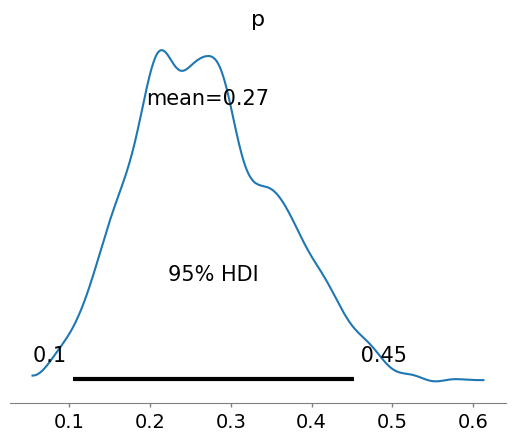

<Axes: title={'center': 'p'}>

In [7]:
import arviz as az

az.plot_posterior(idata, show=True, hdi_prob=0.95)

<Axes: title={'center': 'p'}>

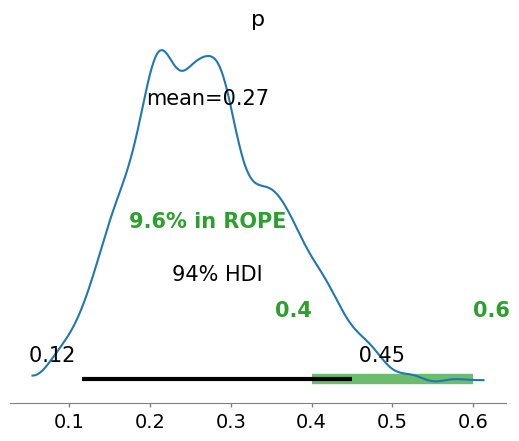

In [8]:
# ROPE: Region Of Practical Equivalence
az.plot_posterior(idata, rope=[0.4, .6])

## Summarizing the Posterior

array([[<Axes: title={'center': 'p'}>, <Axes: title={'center': 'p'}>]],
      dtype=object)

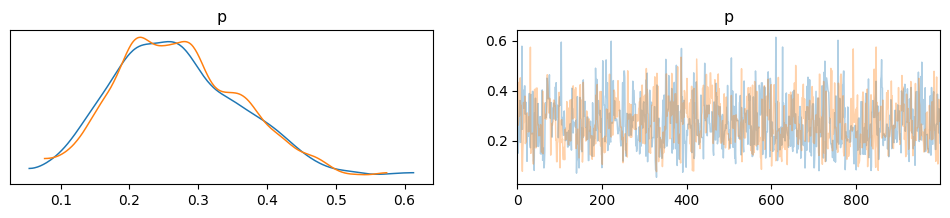

In [9]:
az.plot_trace(idata, combined = False, compact=False)

Depending on the number of chains (N), you have N curves.

The plots on the left are obtained from Kernel Density Estimation (KDE) of the corresponding histograms, while the plots on the right are the sampled values from each chain.

You should compare these curves with those obtained analytically in the previous lecture.

In [10]:
#it returns a Pandas dataframe
az.summary(idata)

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,0.271,0.092,0.116,0.45,0.003,0.002,856.0,1290.0,1.0


That’s the mean from all the chains… HDI are simple to understand at this point. The other metrics will be explained in the following lectures, but for now know that they are used to interpret the results of a Bayesian inference.

**HPD**: High Posterior Density; **HDI**: is the highest density interval. Another way of summarizing a distribution, which we will use often, abbreviated HDI. The HDI indicates which points of a distribution are most credible, and which cover most of the distribution.

They are often used as synonyms in the legends of the plots.

**Geeks**
If you want to learn more:

* mcse: Monte Carlo Standard Error

* ess: effective-sample size

* ess_bulk: useful measure for sampling efficiency in the bulk of the distribution. The rule of thumb for ess_bulk is for this value to be greater than 100 per chain on average. Since we ran N chains, we need ess_bulk to be greater than N*100 for each parameter.

* ess_tail: compute a tail effective sample size estimate for a single variable. The rule of thumb for this value is also to be greater than 100 per chain on average.

* r_hat: diagnostic tests for lack of convergence by comparing the variance between multiple chains to the variance within each chain. converges to unity when each of the traces is a sample from the target posterior. Values greater than one indicate that one or more chains have not yet converged.

## Posterior-based decisions (is the coin fair?)

Strictly speaking, a fair coin θ=0.5. But the probability of observing exactly 0.5 is practcally 0. We can relax this definition of fairness to a Region of Practical Equivalence (ROPE), say [0.45,0.55] (it depends on your expectations and prior knowledge and it is always context-dependent).

There are three scenarios:

* the ROPE does not overlap with the HDI; the coin is not fair

* the ROPE contains the entire HDI; the coin is fair

* the ROPE partially overlaps with HDI; we cannot make any conclusions

Unlike a frequentist approach, Bayesian inference is not based on statistical significance, where effects are tested against “zero”. Indeed, the Bayesian framework offers a probabilistic view of the parameters, allowing assessment of the uncertainty related to them. Thus, rather than concluding that an effect is present when it simply differs from zero, we would conclude that the probability of being outside a specific range that can be considered as “practically no effect” (i.e., a negligible magnitude) is sufficient. This range is called the region of practical equivalence (ROPE).

Therefore, ***the idea underlining ROPE is to let the user define an area around the null value enclosing values that are equivalent to the null value for practical purposes***

<Axes: title={'center': 'p'}>

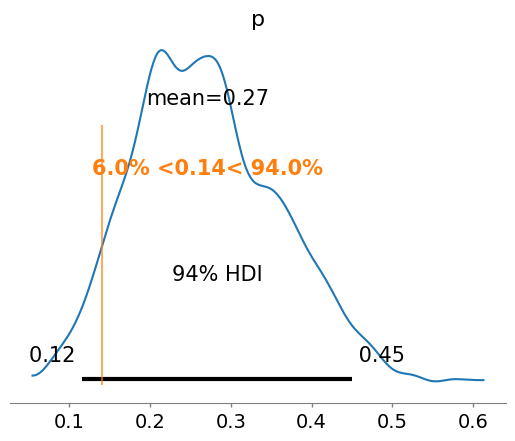

In [12]:
az.plot_posterior(idata, ref_val=0.14)